#Análisis Exploratorio de Datos (EDA), Patrones e indentificación de insights de los datos operacionales de las plantas de generación de energía eléctrica a lo largo de 4 años (2019 - 2022) de una empresa en Colombia
##realizado por:  Bayron A. Guamá

##resumen:
##1. Limpieza de datos
##2. Análisis y Visualización
###2.1 Análisis general
###2.2 Análisis de las centrales


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("/content/registro_indisponibilidades.xlsx")

- debido a que el dataframe presenta muchas variables, vamos a dejar unicamente algunas que consideramos más relevantes para el análisis.
- también modificamos los nombres de las centrales y unidades ya que es información privada.

In [4]:
#dejamos las variables que pueden ser más relevantes en el análisis
dfa = df[[
       'Clasificación XM', 'Mes', 'Fecha Inicio',
       'Fecha Fin', 'Duración (hh)', 'Duración (dd)', 'Central',
       'Pot. Disp. (MW)', 'Pot. Max. N. (MW)', 'Ene. Indisp. (MWh)',
        'Causa',
       'Motivación', 'Costes',
       'Sistema Intervenido']]

In [5]:
# Crear un mapeo de los nombres originales de las Centrales a nombres anonimizados
mapeo_centrales = {nombre: f'Central {i+1}' for i, nombre in enumerate(dfa['Central'].unique())}

# Anonimizar la columna 'Central' usando .loc
dfa.loc[:, 'Central'] = dfa['Central'].map(mapeo_centrales)

display(dfa.head())

,Clasificación XM,Mes,Fecha Inicio,Fecha Fin,Duración (hh),Duración (dd),Central,Pot. Disp. (MW),Pot. Max. N. (MW),Ene. Indisp. (MWh),Causa,Motivación,Costes,Sistema Intervenido
0,NaN,2021-11-05 00:00:00,2021-11-05 00:00:00,2021-11-08 00:00:00,72.00,3.00,Central 1,14.2,14.2,0.00,100 - Pruebas,CO-PRU - Modernización Tele Control,NaN,"AUTOMATIZACION Y MANDO, MANDO Y CONTROL REMOTO..."
1,NaN,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-15 00:00:00,336.00,14.00,Central 2,0.0,250.0,84000.00,510 - Mantenimiento correctivo no planificado,CO-IND - Excitación,NaN,NaN
2,NaN,2019-01-03 10:00:00,2019-01-03 10:00:00,2019-01-05 07:00:00,45.00,1.88,Central 2,0.0,250.0,11250.00,510 - Mantenimiento correctivo no planificado,CO-IND - Regulador Velocidad,NaN,NaN
3,NaN,2019-01-03 09:10:00,2019-01-03 09:10:00,2019-01-04 00:00:00,14.83,0.62,Central 3,0.0,35.0,519.16,550 - Fallo,CO-IND - Generador,NaN,NaN
4,NaN,2019-01-04 21:25:00,2019-01-04 21:25:00,2019-01-04 23:30:00,2.08,0.09,Central 2,0.0,250.0,520.83,550 - Fallo,CO-IND - Sistema Agua Refrigeración,NaN,NaN


# 1. Limpieza de datos
identificamos que la fecha fin no es datetime, así que analizamos y convertimos esta columna a formato fecha para mejorar el manejo del análisis.

In [6]:
dfa['Fecha Fin'] = pd.to_datetime(dfa['Fecha Fin'],format= '%d/%m/%Y %H:%M')

/tmp/ipython-input-4210894428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Fecha Fin'] = pd.to_datetime(dfa['Fecha Fin'],format= '%d/%m/%Y %H:%M')


In [7]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156 entries, 0 to 3155
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Clasificación XM     682 non-null    object        
 1   Mes                  3156 non-null   datetime64[ns]
 2   Fecha Inicio         3156 non-null   datetime64[ns]
 3   Fecha Fin            3156 non-null   datetime64[ns]
 4   Duración (hh)        3129 non-null   float64       
 5   Duración (dd)        3129 non-null   float64       
 6   Central              3156 non-null   object        
 7   Pot. Disp. (MW)      3156 non-null   float64       
 8   Pot. Max. N. (MW)    3156 non-null   float64       
 9   Ene. Indisp. (MWh)   3156 non-null   float64       
 10  Causa                3156 non-null   object        
 11  Motivación           3143 non-null   object        
 12  Costes               151 non-null    float64       
 13  Sistema Intervenido  491 non-null

In [8]:
# Contar registros duplicados
n_dup = dfa.duplicated().sum()
print(f'Registros duplicados: {n_dup}')

Registros duplicados: 134


En el siguiente gráfico podemos observar la cantidad de valores faltantes o nulos que hay en nuestros datos.

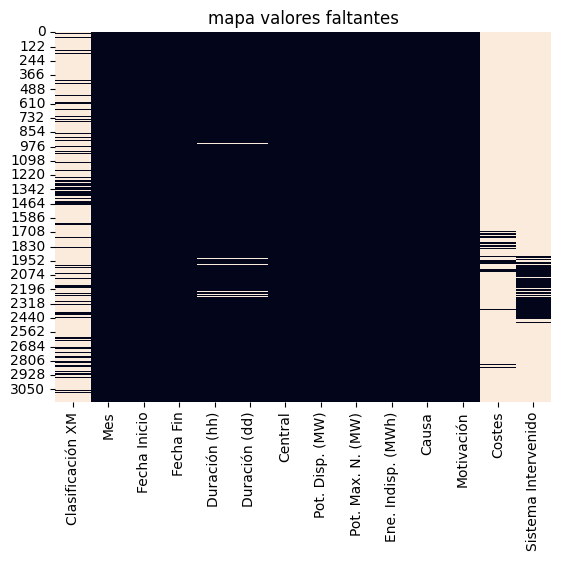

In [9]:
plt.figure
sns.heatmap(dfa.isnull(), cbar=False)
plt.title("mapa valores faltantes")
plt.show()

Teniendo en cuanta la gráfica y el procentaje de nulos, concluimos que las variables de clasificación XM, costes y sistema intervenido son las más criticas.

In [10]:
porcentaje_nulos = dfa.isnull().mean() * 100
print(porcentaje_nulos)

Clasificación XM       78.390368
Mes                     0.000000
Fecha Inicio            0.000000
Fecha Fin               0.000000
Duración (hh)           0.855513
Duración (dd)           0.855513
Central                 0.000000
Pot. Disp. (MW)         0.000000
Pot. Max. N. (MW)       0.000000
Ene. Indisp. (MWh)      0.000000
Causa                   0.000000
Motivación              0.411914
Costes                 95.215463
Sistema Intervenido    84.442332
dtype: float64


- Costes: llenamos con ceros asumiendo que si no hay información sobre los costes, se considera que no hubo coste
- Clasificación XM: Rellenamos los valores nulos en la columna 'Clasificación XM' con la cadena 'No clasificado'
- Sistema Intervenido: Rellenamos los valores nulos en la columna 'Sistema Intervenido' con la cadena 'Sin info'
- Motivación: Rellenamos los valores nulos en la columna 'Motivación' con la cadena 'Sin info'

In [11]:
#quitamos datos nulos de las columnas
dfa['Costes'] = dfa['Costes'].fillna(0)  #asumimos que si no hay informacion, no hubo coste por esta indisponibilidad
dfa['Clasificación XM'] = dfa['Clasificación XM'].fillna('No clasificado')
dfa['Sistema Intervenido'] = dfa['Sistema Intervenido'].fillna('Sin info')
dfa['Motivación'] = dfa['Motivación'].fillna('Sin info')

/tmp/ipython-input-1512035926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Costes'] = dfa['Costes'].fillna(0)  #asumimos que si no hay informacion, no hubo coste por esta indisponibilidad
/tmp/ipython-input-1512035926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Clasificación XM'] = dfa['Clasificación XM'].fillna('No clasificado')
/tmp/ipython-input-1512035926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

si bien el porcentaje de nulos en las columnas Duracio(dd) y Duración (hh), es bajo (0.8%), consideramos que hay datos que pueden aportar gran valor
al análisis, así que los vamos a llenar realizando un cálculo entre las columnas respectivas de las fechas.

Este ejercicio también sirve para desenvolvernos realizando operaciones entre columnas y formatos fechas.

In [12]:
dfanulos = dfa[dfa['Duración (dd)'].isnull()]
dfanulos['Duración (dd)'] = (dfanulos['Fecha Fin']-dfanulos['Fecha Inicio']).dt.days
dfanulos['Duración (hh)'] = ((dfanulos['Fecha Fin']-dfanulos['Fecha Inicio']).dt.days)*24 + (dfanulos['Fecha Fin']-dfanulos['Fecha Inicio']).dt.components['hours']

/tmp/ipython-input-1762848113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfanulos['Duración (dd)'] = (dfanulos['Fecha Fin']-dfanulos['Fecha Inicio']).dt.days
/tmp/ipython-input-1762848113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfanulos['Duración (hh)'] = ((dfanulos['Fecha Fin']-dfanulos['Fecha Inicio']).dt.days)*24 + (dfanulos['Fecha Fin']-dfanulos['Fecha Inicio']).dt.components['hours']


In [13]:
dfa['Duración (hh)'].update(dfanulos['Duración (hh)'])
dfa['Duración (dd)'].update(dfanulos['Duración (dd)'])

/tmp/ipython-input-2994857398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfa['Duración (hh)'].update(dfanulos['Duración (hh)'])
/tmp/ipython-input-2994857398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Duración (hh)'].update(dfanulos['Duración (hh)'])
/tmp/ipython-input-2994857398.py:2: FutureWarning: A value is trying to

Luego de los procesos anteriormente aplicados, obtenemos el dataframe limpio.

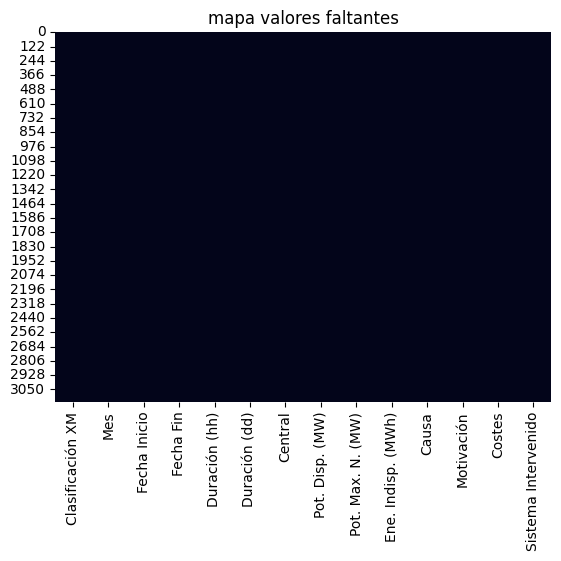

In [14]:
#cero valores nulos
plt.figure
sns.heatmap(dfa.isnull(), cbar=False)
plt.title("mapa valores faltantes")
plt.show()

In [15]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156 entries, 0 to 3155
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Clasificación XM     3156 non-null   object        
 1   Mes                  3156 non-null   datetime64[ns]
 2   Fecha Inicio         3156 non-null   datetime64[ns]
 3   Fecha Fin            3156 non-null   datetime64[ns]
 4   Duración (hh)        3156 non-null   float64       
 5   Duración (dd)        3156 non-null   float64       
 6   Central              3156 non-null   object        
 7   Pot. Disp. (MW)      3156 non-null   float64       
 8   Pot. Max. N. (MW)    3156 non-null   float64       
 9   Ene. Indisp. (MWh)   3156 non-null   float64       
 10  Causa                3156 non-null   object        
 11  Motivación           3156 non-null   object        
 12  Costes               3156 non-null   float64       
 13  Sistema Intervenido  3156 non-nul

Una ultima operación antes de empezar el análisis, separar año, mes y dia en columnas diferetnes.

In [16]:
#separar año,mes, dia en nuevas columna

#db['año'] = db['día_consumo'].dt.year
dfa['año'] = dfa['Mes'].dt.year
dfa['mes'] = dfa['Mes'].dt.month
dfa['dia'] = dfa['Mes'].dt.day

/tmp/ipython-input-4142781036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['año'] = dfa['Mes'].dt.year
/tmp/ipython-input-4142781036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['mes'] = dfa['Mes'].dt.month
/tmp/ipython-input-4142781036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [17]:
dfa['Clasificación XM'].unique()

array(['No clasificado', 'Mantenimiento Predictivo (Inspección Rodete)',
       'Trabajos en controles de generación con modificación de ajustes (regulador de velocidad, regulador de tensión, limitadores de excitación, PSS)',
       'Mantenimiento Preventivo Anual',
       'Mantenimiento Preventivo Mensual',
       'Trabajos en la conducción (túneles, tuberías, Válvulas, Bocatomas, Compuertas)',
       'Mantenimiento Preventivo Semestral', 'Mantenimiento Correctivo',
       'Modernización Equipo Principal (Regulador Velocidad, Excitación, Interruptor Potencia, otros)',
       'Interferencia técnica (por otra central)',
       'Trabajos de Termografía',
       'Trabajos en generador-turbina (Cargabilidad-Vibraciones)',
       'Overhaul', 'Trabajos en sistema de arranque autónomo (SCADA)',
       'Por condición del mantenimiento el equipo no se puede normalizar en los periodos de Punta 2'],
      dtype=object)

#2. Análisis y Visualización
##2.1 Análisis general



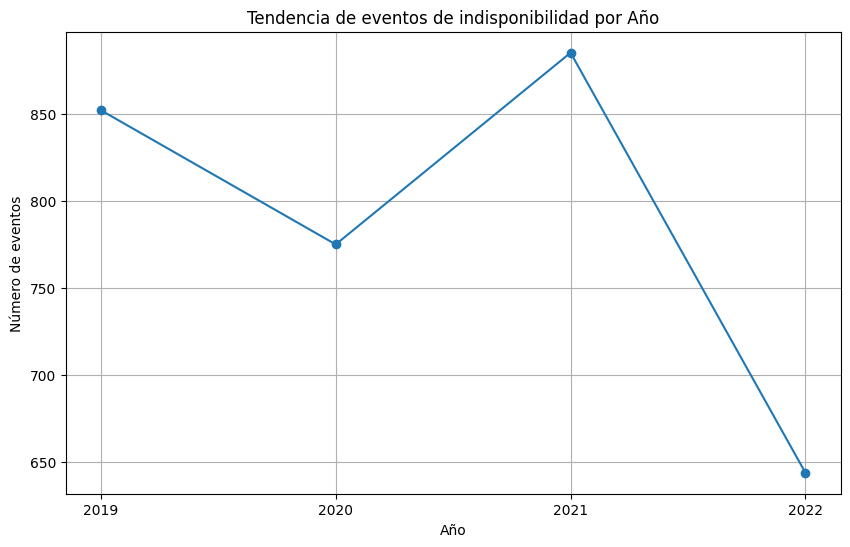

In [18]:
# Agrupar por año y contar eventos
eventos_por_año = dfa['año'].value_counts().sort_index()

# Crear gráfico de líneas por año
plt.figure(figsize=(10, 6))
eventos_por_año.plot(kind='line', marker='o')
plt.title('Tendencia de eventos de indisponibilidad por Año')
plt.xlabel('Año')
plt.ylabel('Número de eventos')
plt.grid(True)
plt.xticks(eventos_por_año.index) # Asegura que se muestren todos los años en el eje x
plt.show()

El anterior gráfico de linea no muestra la reducción considerable de eventos en las diferetnes centrales de generación pasasndo de: 780 - 880 eventos a menos de 650 en el ultimo año de análisis. Una reducción del 26% con respecto al ultimo añoesto significa quela empresa, entre otras actividades, realizó un(a):

*   Fortalecimiento del mantenimiento predictivo y preventivo,
*   Modernización tecnológica,
*   Mejora en la planeación y programación del mantenimiento






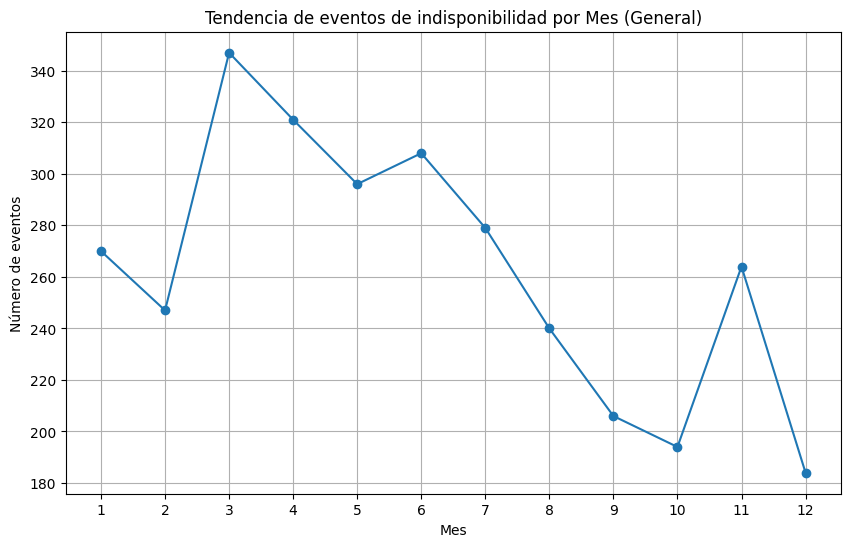

In [19]:
# Agrupar por mes y contar eventos
eventos_por_mes = dfa['mes'].value_counts().sort_index()

# Crear gráfico de líneas por mes
plt.figure(figsize=(10, 6))
eventos_por_mes.plot(kind='line', marker='o')
plt.title('Tendencia de eventos de indisponibilidad por Mes (General)')
plt.xlabel('Mes')
plt.ylabel('Número de eventos')
plt.grid(True)
plt.xticks(range(1, 13)) # Asegura que se muestren todos los meses en el eje x
plt.show()

En el gráfico de lineas anterior, podemos identificar los meses en los que se presentan menos eventos de indisponibilidad, estos son: septiembre, octubre y diciembre con un valor entre 180 y 210 eventos aproximadamente.

Esto puede estar asociado a una combinación de factores como la programación estratégica de mantenimientos en meses previos, mayor estabilidad de la operación hacia final de año y posibles condiciones estacionales favorables

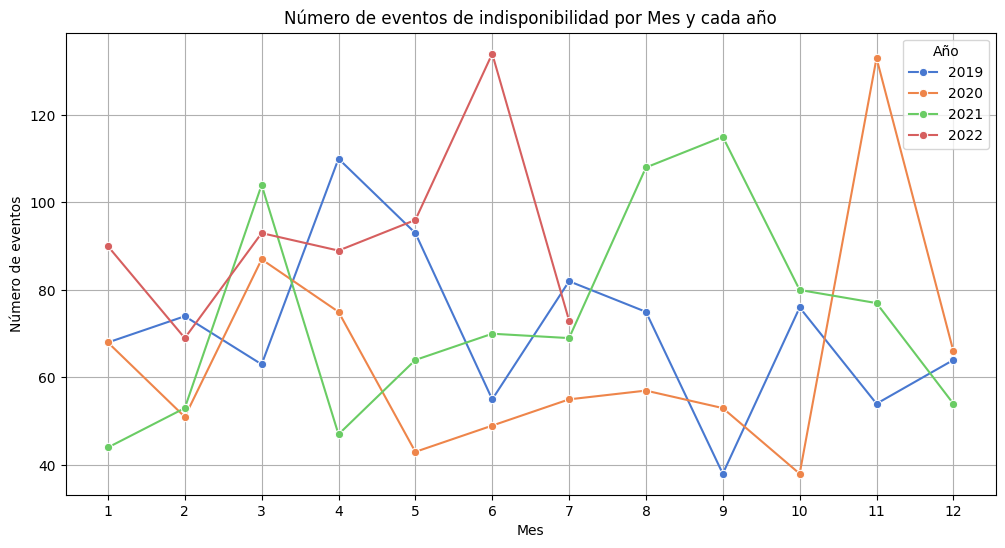

In [20]:
# Agrupar por año y mes y contar eventos
eventos_por_año_mes = dfa.groupby(['año', 'mes']).size().reset_index(name='Count')

# Crear gráfico de líneas para ver la tendencia mensual por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=eventos_por_año_mes, x='mes', y='Count', hue='año', marker='o', palette = 'muted')
plt.title('Número de eventos de indisponibilidad por Mes y cada año')
plt.xlabel('Mes')
plt.ylabel('Número de eventos')
plt.xticks(range(1, 13)) # Asegura que se muestren todos los meses en el eje x
plt.grid(True)
plt.legend(title='Año')
plt.show()

El anterior gráfico de lineas muestra y revela información importante con respecto a los eventos anuales, se indetifica que hubo unos picos de eventos considerables en el 2022 (junio) y 2020 (noviembre). Será importante establecer por qué ese incremento tan pronunciado en esos meses.

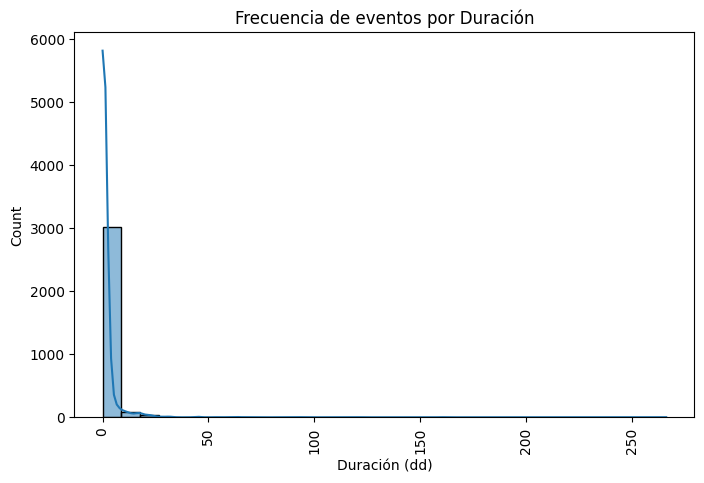

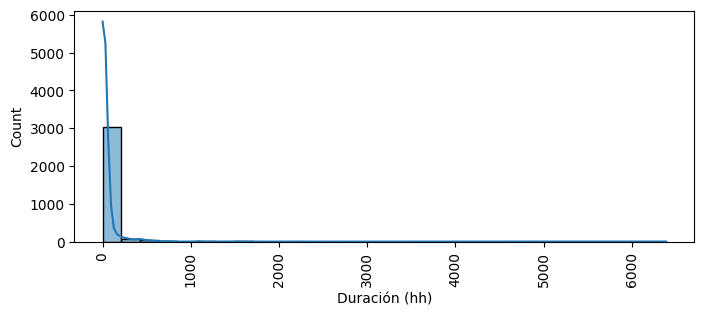

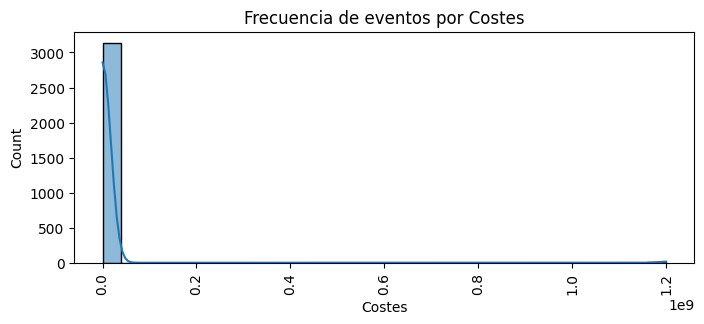

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(dfa['Duración (dd)'], bins = 30, kde = True)
plt.title('Frecuencia de eventos por Duración')
plt.xticks(rotation = 90)

plt.show()

plt.figure(figsize=(8,3))
sns.histplot(dfa['Duración (hh)'], bins = 30, kde = True)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(8,3))
sns.histplot(dfa['Costes'], bins = 30, kde = True)
plt.title('Frecuencia de eventos por Costes')
plt.xticks(rotation = 90)
plt.show()

Los anteriores gráficos de frecuencia, muestran la duración de los eventos; podemos ver que los valores se agrupan en cero o alrededor de este valor, es lógico ya que una empresa de energía requiere que la duración y el coste de los eventos sea lo minima posible.

Ahora análicemos la frecuencia de los eventos según clasificación XM, primero ajustamos un poco el nombre de las variables ya que son muy extensos

In [22]:
# Acortar los nombres de la columna 'Clasificación XM' eliminando el texto entre paréntesis
dfa['Clasificación XM_short'] = dfa['Clasificación XM'].str.replace(r'\s*\(.*\)', '', regex=True)

# Realizar los reemplazos de nombres específicos
dfa['Clasificación XM_short'] = dfa['Clasificación XM_short'].replace({
    'Trabajos en controles de generación con modificación de ajustes': 'Trabajos en control Gen',
    'Por condición del mantenimiento el equipo no se puede normalizar en los periodos de Punta 2': 'No se pudo normalizar por cond de Mtto'
})

/tmp/ipython-input-2667657762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Clasificación XM_short'] = dfa['Clasificación XM'].str.replace(r'\s*\(.*\)', '', regex=True)
/tmp/ipython-input-2667657762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Clasificación XM_short'] = dfa['Clasificación XM_short'].replace({


In [23]:
dfa['Clasificación XM_short'].value_counts()

,count
Clasificación XM_short,
No clasificado,2474
Mantenimiento Predictivo,388
Mantenimiento Preventivo Anual,57
Trabajos en la conducción,48
Trabajos en generador-turbina,43
Mantenimiento Preventivo Mensual,36
Mantenimiento Preventivo Semestral,35
Modernización Equipo Principal,22
Trabajos en control Gen,20


In [24]:
total_noclas = dfa['Clasificación XM_short'].value_counts().sum()
print((2474/total_noclas)*100)

78.39036755386564


/tmp/ipython-input-2531115306.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frecuencias_clafxm, x='Count', y='Clasificación XM_short', palette='RdGy')


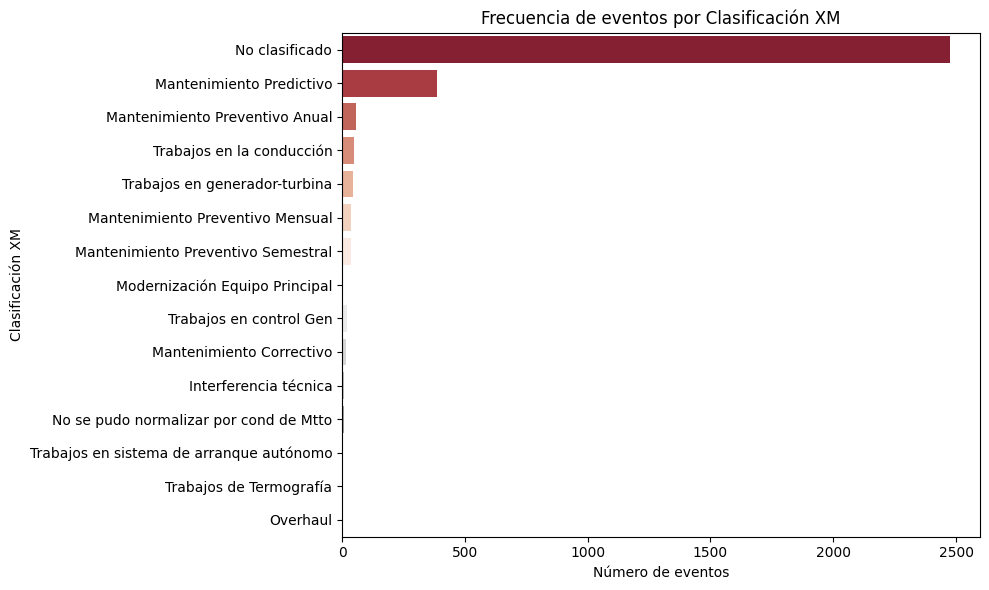

In [25]:


# Filtrar los datos excluyendo 'No clasificado'
#clafxm = dfa[dfa['Clasificación XM_short'] != 'No clasificado']

# Calcular la frecuencia de cada categoría acortada
frecuencias_clafxm = dfa['Clasificación XM_short'].value_counts().reset_index()
frecuencias_clafxm.columns = ['Clasificación XM_short', 'Count']

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(data=frecuencias_clafxm, x='Count', y='Clasificación XM_short', palette='RdGy')
plt.title("Frecuencia de eventos por Clasificación XM")
plt.xlabel("Número de eventos")
plt.ylabel("Clasificación XM")
plt.tight_layout()
plt.show()

Del anterior grafico podemos observar que la mayoria de eventos no fueron clasificados o reportados en la categoría XM (78.4%), probablemente por errores operativos de los operadores u otras razones, será importante determinar la importancia de dicha información en el reporte operativo. Pero con esta información, preliminarmente, no nos permite establecer con claridad el tipo de evento predominante. Claramente en segundo lugar está: Mantenimiento predictivo se refiere a inspección de rodetes es decir un proceso que involucra directamente las máquinas de generación de energía.

In [26]:
# Filtrar el DataFrame para incluir solo los eventos clasificados como 'No clasificado' en 'Clasificación XM_short'
df_no_clasificado = dfa[dfa['Clasificación XM_short'] == 'No clasificado']

# Contar la frecuencia de cada 'Causa' dentro de los eventos no clasificados
causas_no_clasificado = df_no_clasificado['Causa'].value_counts().reset_index()
causas_no_clasificado.columns = ['Causa', 'Count']

# Mostrar las causas más frecuentes para los eventos no clasificados
(causas_no_clasificado).head()

,Causa,Count
0,510 - Mantenimiento correctivo no planificado,591
1,550 - Fallo,421
2,505 - Interferencia técnica no planificada,285
3,100 - Pruebas,237
4,520 - Extensión del mantenimiento planificado,231


En la anterior tabla establecemos la frecuencia de eventos según la columna de "CAUSA", que estan en "Categoría XM" como "No clasificados"

/tmp/ipython-input-3134722127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=causas, x='Eventos', y='Causa', palette='RdGy')


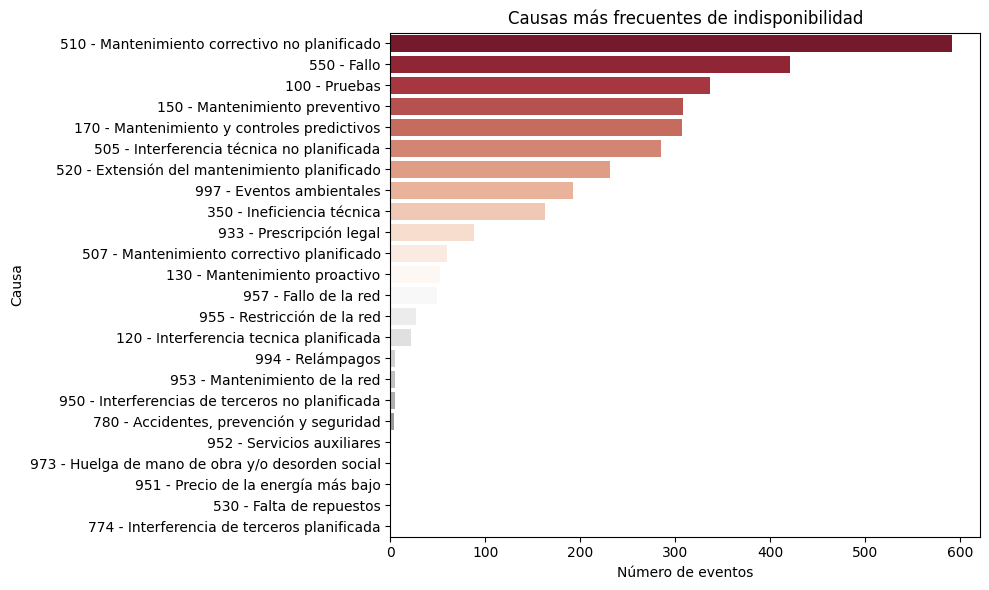

In [27]:

causas = dfa['Causa'].value_counts().reset_index()
causas.columns = ['Causa', 'Eventos']

plt.figure(figsize=(10, 6))
sns.barplot(data=causas, x='Eventos', y='Causa', palette='RdGy')
plt.title("Causas más frecuentes de indisponibilidad")
plt.xlabel("Número de eventos")
plt.ylabel("Causa")
plt.tight_layout()
plt.show()

Al "cruzar" la información de la columna "Clasificación XM" y "Causa" nos damos cuenta que la mayoria de datos que estaban como "No clasificado" pertenecen a eventos de fallas, según la columna "Causa", en otras palabras y según la gráfica anterior podemos observar que las causas principales de eventos en las centrales son debido principalmente a fallas.

In [28]:
dfa_cont_fallas = dfa['Causa'].value_counts().reset_index()
dfa_cont_fallas['Porcentaje'] = (dfa_cont_fallas['count'] / dfa_cont_fallas['count'].sum()) * 100
dfa_cont_fallas.head(6)

,Causa,count,Porcentaje
0,510 - Mantenimiento correctivo no planificado,591,18.726236
1,550 - Fallo,421,13.339670
2,100 - Pruebas,336,10.646388
3,150 - Mantenimiento preventivo,308,9.759189
4,170 - Mantenimiento y controles predictivos,307,9.727503
5,505 - Interferencia técnica no planificada,285,9.030418


Con la anterior tabla se muestran los porcentajes de las causas principales de eventos de indisponibilidades. Un aproximado de 40% de estas se deben eventos no planificados (510, 550, 505), este tipo de eventos afectan ala confiabilidad en la producción de energía y desencadenan otra serie de eventos para poder mitigar.


In [29]:
causas_por_año = dfa.groupby(['año', 'Causa']).size().reset_index(name='Conteo')

In [30]:
total_eventos_por_año = causas_por_año.groupby('año')['Conteo'].sum().reset_index(name='Total_Anual')
causas_por_año = pd.merge(causas_por_año, total_eventos_por_año, on='año')
causas_por_año['Porcentaje'] = (causas_por_año['Conteo'] / causas_por_año['Total_Anual']) * 100
#display(causas_por_año.head())

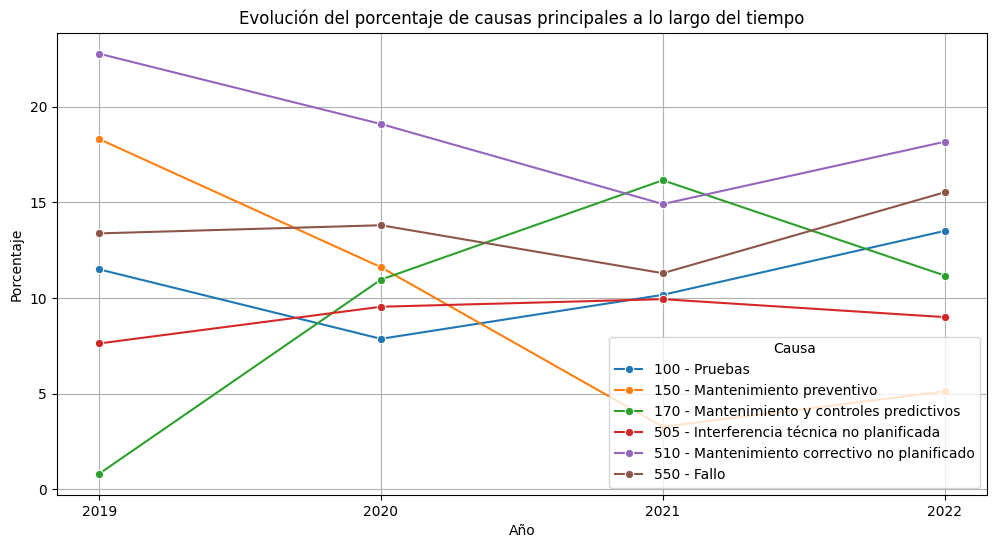

In [31]:
# Determine the top N causes based on overall frequency
top_n_causes = dfa_cont_fallas.head(6)['Causa'].tolist()

# Filter causas_por_año to include only the top N causes
causas_top_n = causas_por_año[causas_por_año['Causa'].isin(top_n_causes)]

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=causas_top_n, x='año', y='Porcentaje', hue='Causa', marker='o')
plt.title('Evolución del porcentaje de causas principales a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.xticks(causas_top_n['año'].unique())
plt.grid(True)
plt.legend(title='Causa')
plt.show()

En la anterior gráfica vemos la evolución anual de las indisponibilidades que tuvimos en el top 6, de la tabla anterior. Tenemos en  cuenta hasta el 2021 ya que para el 2022 la información está incompleta. Ella nos indica el aumento de los eventos por mtto predictivo, y caida de los eventos por mtto preventivo y fallos y mtto correctivo no planeado, lo cual indica un avance, en general, positivo en la estrategia de mitigación de fallas.

## 2.2 Análisis de las Centrales

In [32]:
df_resumen = dfa.groupby("Central").agg({
    "Duración (dd)": ["count", "mean", "sum"]
}).reset_index()
df_resumen.columns = ['Central', 'Eventos', 'Duracion_media', 'Duracion_total']


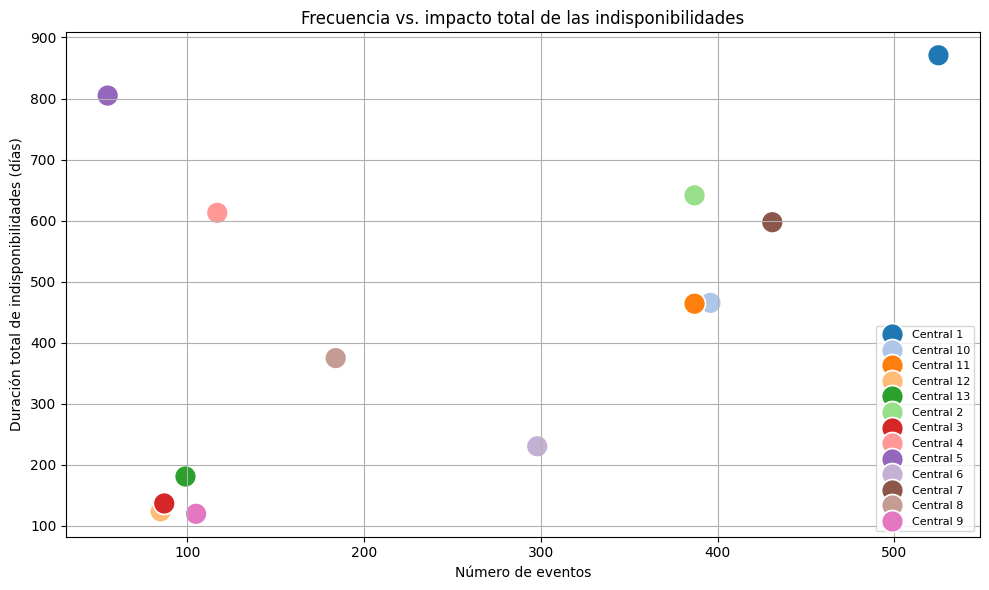

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_resumen, x='Eventos', y='Duracion_total', hue='Central', palette='tab20', s=250)
plt.xlabel("Número de eventos")
plt.ylabel("Duración total de indisponibilidades (días)")
plt.title("Frecuencia vs. impacto total de las indisponibilidades")
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=8)
plt.show()

La anterior gráfica muestra la comparación entre el numero de eventos y la duración de las indisponibilidades por central. En la operación de centrales de energía el tiempo que la central se encuentra en falla es crucial, por lo tanto ese será el factor clave en esa gráfica; podemos identificar 3 grupos:

1.   las centrales que tuvieron una duracion < 300
2.   las centrales en las que la duración de las indisponibilidades fue entre 300 y 500.
3.   las centrales que estuvieron más tiempo con fallas, > 500.

También podemos identificar que la central 1 es la más crítica ya que presenta el mayor numero de eventos y la mayor duración.

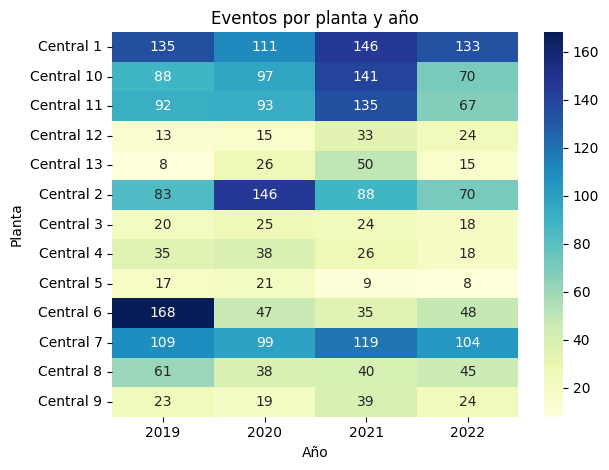

In [34]:
#dfa['Año'] = pd.to_datetime(dfa['mes']).dt.year
tabla = pd.crosstab(dfa['Central'], dfa['año'])

sns.heatmap(tabla, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Eventos por planta y año")
plt.xlabel("Año")
plt.ylabel("Planta")
plt.tight_layout()
plt.show()

La anterior tabla muestra las centrales con la cantidad de eventos por cada año. (sin tener en cuenta 2022).
Con esta identificamos la evolución positiva o negativa, se espera que al transcurrir los años se vean reducida la cantidad de eventos.
las centrales 1, 10, 11, 12, 13, para 2021, aumentaron la cantidad de eventos de manera c onsiderable. Centrales 4, 5, 6 redujeron el numero de eventos.



In [43]:
tabla_causa = pd.crosstab(dfa['Central'], dfa['Causa'])

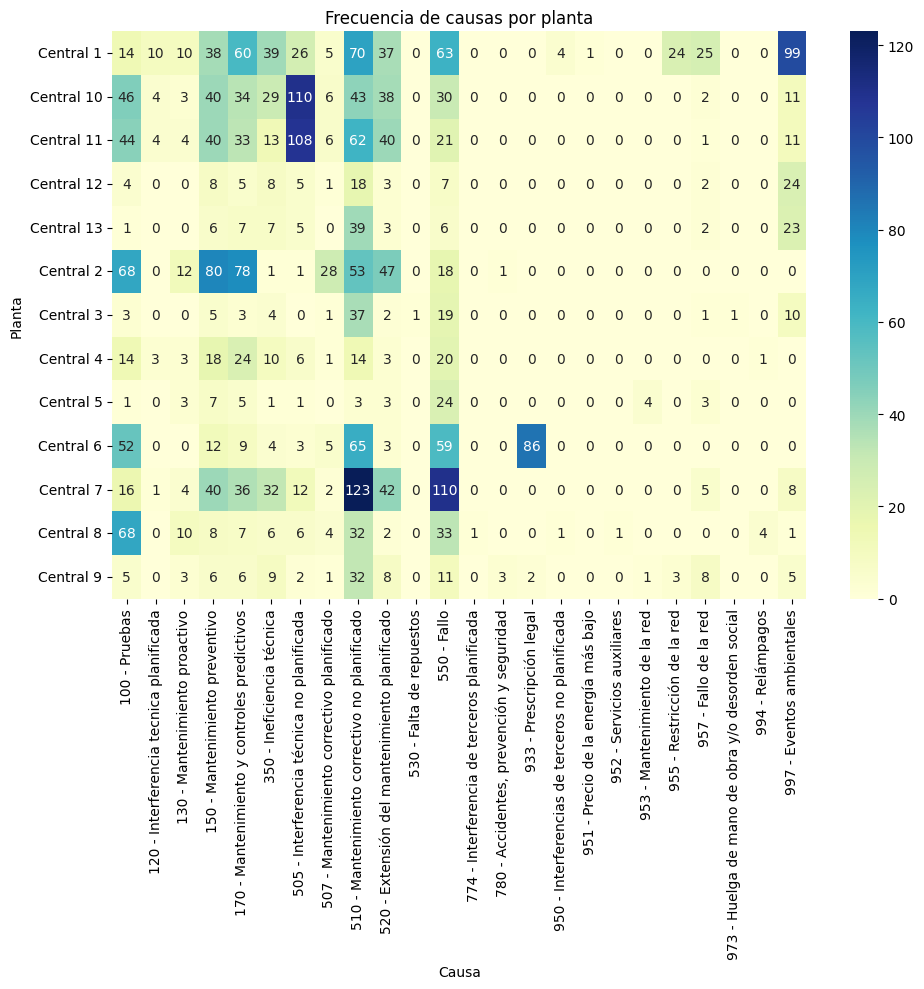

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(tabla_causa, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Frecuencia de causas por planta")
plt.xlabel("Causa")
plt.ylabel("Planta")
plt.tight_layout()
plt.show()

La anterior gráfica es muy importante ya que nos ayuda a identificar las principales fallas que presentan las centrales y de esta forma tomar mejores acciones preventivas y predictivas.
Por ejemplo la central 1, que anteriormente identificamos que era la más crítica, la principal indisponibilidad se debe a causas ambientales ( Tormentas eléctricas, inundaciones, vientos fuertes, nevadas intensas, sequías prolongadas, temperaturas extremas (altas o bajas)